#Sigmoid refinement function

In [1]:
import numpy as np
import math
import matplotlib.pylab as pyplt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [70]:
def sigmoid(x, k, a):
    x0 = abs(x)
    if x > 0:
        y2 = (-1*k*x0)/(-1*x0 - a)
    else:
        y2 = -1*(-1*k*x0)/(-1*x0 - a)
    return y2

In [71]:
def sigmoid2(x, a):
    x0 = abs(x)
    if x > 0:
        y2 = 1./(1 + math.e**(-x0*a))
    else:
        y2 = -1./(1 + math.e**(-x0*a))
    return y2

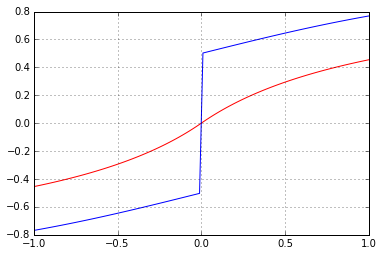

In [78]:
#This notebook implements a logarithmic mesh refinement of the unit 
k =1.0
a = 1.2
x = np.linspace(-1,1.,100)
y1 = [sigmoid(X,k,a) for X in x] 
y2 = [sigmoid2(X, a) for X in x]

pyplot.plot(x, y1, color='r')
pyplot.plot(x, y2, color='b')
pyplot.grid()

In [46]:
print(sigmoid(0,k,a), sigmoid(1,k,a))
print(sigmoid2(0,a), sigmoid2(1,a))

(-0.0, 0.10909090909090909)
(0.5, 0.9999546021312976)


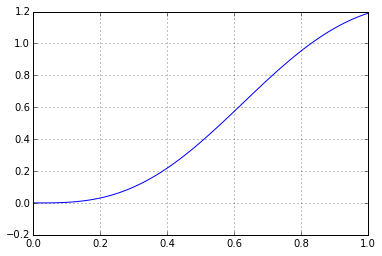

In [83]:
#This notebook implements a logarithmic mesh refinement of the unit 
k =1.2
a = 10
x = np.linspace(0,1,100)
y1 = [X - 0.2*math.sin(1.6*math.pi*X) for X in x]
#y2 = [sigmoid2(2*(X-0.5), a) for X in x]

pyplot.plot(x, y1)
#pyplot.plot(x, y2)
pyplot.grid()

In [86]:
max(y1)

1.1902113032590307

In [7]:
# RT PIC - classic and nearest neighbour
import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt
import numpy as np
import os
from shapely.geometry import Polygon
from shapely.geometry import Point

In [8]:
dim = 2

meshX = 64
meshY = 32

In [9]:
# create mesh objects
elementMesh = uw.mesh.FeMesh_Cartesian( elementType='Q1/dQ0', 
                                         elementRes=(meshX, meshY), 
                                           minCoord=(0.,0.), 
                                           maxCoord=(1.,1.0))
linearMesh   = elementMesh
constantMesh = elementMesh.subMesh

In [10]:
# create fevariables
velocityField    = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=dim )
pressureField    = uw.fevariable.FeVariable( feMesh=constantMesh, nodeDofCount=1 )
temperatureField = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=1 )

In [11]:
for index, coord in enumerate(linearMesh.data):
    if coord[1] < 0.7:
        temperatureField.data[index] = 0.5  
    else:
        temperatureField.data[index] = 1. - coord[1]
    

In [12]:
sigmoid2(2*(0-0.5), 0)

0.5

In [13]:

newys = []
for index, coord in enumerate(linearMesh.data):
    midpoint = (linearMesh.maxCoord[1] - linearMesh.minCoord[1])/2.
    scalefact = 2./(linearMesh.maxCoord[1] - linearMesh.minCoord[1])
    y0 = coord[1]
    #print y0
    yS = abs(y0 - midpoint)*scalefact
    newy = sigmoid(yS,k,a)
    newy = sigmoid2(2*(y0-0.5), 5.)
    #print newy
    #print (newy /scalefact) + midpoint
    newys.append(newy)

In [14]:
with linearMesh.deform_mesh():
    linearMesh.data[:,1] = newys

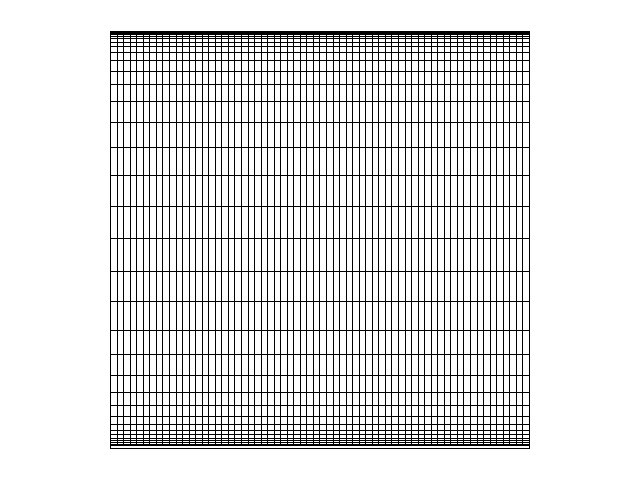

In [16]:
    
figtemp = plt.Figure()
#figtemp.Surface(temperatureField, elementMesh)
#figtemp.Surface(indexField, elementMesh)
figtemp.Mesh(linearMesh, colourBar=False)
figtemp.show()